# Plotting Outliers - Examples

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from outlier_plotting.sns import handle_outliers

## Test Data

In [2]:
np.random.seed(42)

In [3]:
df = pd.DataFrame()

df['value'] = np.hstack([-1000, -100, -10, np.random.normal(0, 1, 50), 10, 100, 1000])
df['type'] = np.random.choice(['cat', 'dog', 'bass'], len(df))
df['size'] = np.random.choice([1, 2, 3], len(df))
df['weight'] = np.random.choice([10, 20], len(df))
df['color'] = np.random.choice(['red', 'brown'], len(df))

df.head()

,value,type,size,weight,color
0,-1000.000000,cat,3,20,brown
1,-100.000000,cat,1,20,red
2,-10.000000,bass,1,20,red
3,0.496714,cat,2,20,brown
4,-0.138264,cat,1,10,brown


## Functionality

`handle_outliers` remove outliers from the plot and show them as text boxes. It can be used with most `seaborn` plotting function that works with long-form data.

Please not that only inliers are passed into the plotting function, consequently density estimates, and functionals are only computed on that subset and **not** representative of the whole data.

Notable exceptions are:

- `countplot`
- `lineplot`
- `scatterplot`

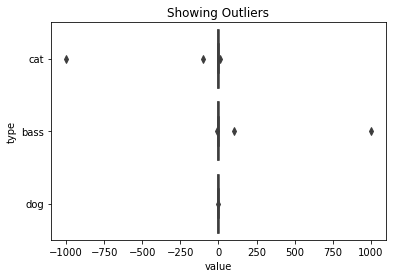

TypeError: '>' not supported between instances of 'float' and 'str'

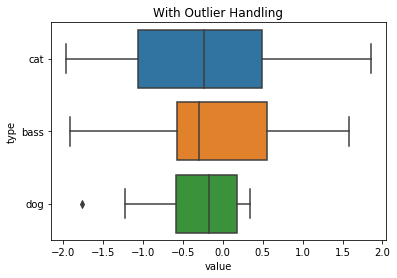

In [4]:
plt.title('Showing Outliers')
sns.boxplot(data=df, y = 'type', x='value')
plt.show()

plt.title('With Outlier Handling')
handle_outliers(data=df, y = 'type', x='value', plotter=sns.boxplot)
plt.show()

## Different Plotters

In [ ]:
for plotter in (sns.pointplot, sns.barplot, sns.swarmplot, sns.stripplot, sns.violinplot, sns.boxplot, 
                sns.boxenplot):
    plt.title(plotter.__name__)
    handle_outliers(data=df, plotter = plotter, x = 'type', y='value')
    plt.show()

In [ ]:
handle_outliers(data=df['value'], plotter=sns.kdeplot);

## Data Formats

In [ ]:
handle_outliers(data=df['value'].values)
plt.show()

handle_outliers(x=df['value'])
plt.show()

handle_outliers(y=df.value, x=df.weight);

## Outlier Detection

A multiple of the IQR is used to detect outliers.

In [ ]:
plt.title('Normal inlier_range')
handle_outliers(data=df, y = 'type', x='value')
plt.show()

plt.title('High inlier_range')
handle_outliers(data=df, y = 'type', x='value', inlier_range = 10)
plt.show()

plt.title('Low inlier_range')
handle_outliers(data=df, y = 'type', x='value', inlier_range = 0);

## Padding and Margin

Due to the impossibility of determining the size of `matplotlib` text, liberal margins have to be added.

Some padding (5% by default) is added between the plot and text.

In [ ]:
plt.title('Normal margin and padding')
handle_outliers(data=df, y = 'type', x='value')
plt.show()

plt.title('No margin')
handle_outliers(data=df, y = 'type', x='value', margin = 0)
plt.show()

plt.title('High margin')
handle_outliers(data=df, y = 'type', x='value', margin = .5)
plt.show()

plt.title('No padding')
handle_outliers(data=df, y = 'type', x='value', padding = 0)
plt.show()

plt.title('High padding')
handle_outliers(data=df, y = 'type', x='value', padding = .5)
plt.show()

## Hue

Due to the aforementioned impossibility of determining the size of `matplotlib` text, it is currently not possible to appropriately plot data with `hue`s.

Rendering text in different colors (which would be the most elegant solution) cannot be done without creating multiple `text`s, which would collide since there extents are unknown.


In [ ]:
handle_outliers(data=df, plotter = sns.violinplot, x = 'type', y='value', hue='size')
plt.show()
handle_outliers(data=df, plotter = sns.violinplot, hue = 'type', y='value', x='size', inlier_range=-.2, margin=.7)
plt.legend(loc='upper center');

## catplot

In [ ]:
handle_outliers(data=df, x='type', y='value', hue='size', col='weight', row='color', plotter=sns.catplot)
plt.show()

handle_outliers(data=df, x='type', y='value', hue='size', col='weight', plotter=sns.catplot,
               kind='violin')
plt.show()

handle_outliers(data=df, x='weight', y='value', hue='size', row='type', plotter=sns.catplot, kind='box')
plt.show()

